In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

In [2]:
colors = Table.read_table(path_data + 'roulette_wheel.csv').column('Color')
pockets = make_array('0','00')
for i in np.arange(1, 37):
    pockets = np.append(pockets, str(i)) 

wheel = Table().with_columns(
    'Pocket', pockets,
    'Color', colors
)

In [3]:
wheel

Pocket | Color
0      | green
00     | green
1      | red
2      | black
3      | red
4      | black
5      | red
6      | black
7      | red
8      | black
... (28 rows omitted)

In [4]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [5]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket | Color | Winnings: Red
0      | green | -1
00     | green | -1
1      | red   | 1
2      | black | -1
3      | red   | 1
4      | black | -1
5      | red   | 1
6      | black | -1
7      | red   | 1
8      | black | -1
... (28 rows omitted)

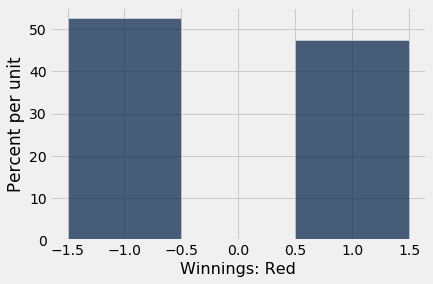

In [6]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

In [7]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

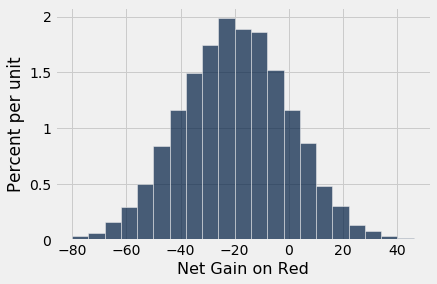

In [8]:
results.hist(bins=np.arange(-80, 50, 6))

In [9]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [10]:
400 * average_per_bet

-21.052631578947366

In [11]:
np.mean(results.column(0))

-20.9586

In [12]:
np.std(results.column(0))

20.029115957525438

In [13]:
united = Table.read_table(path_data + 'united_summer2015.csv')

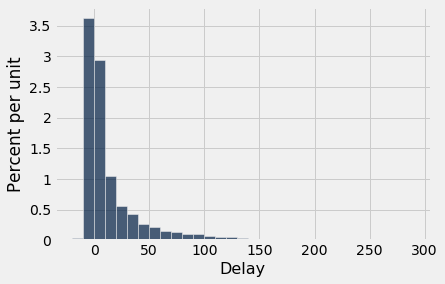

In [14]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [15]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [16]:
delay = united.select('Delay')

In [17]:
np.mean(delay.sample(400).column('Delay'))

15.59

In [18]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

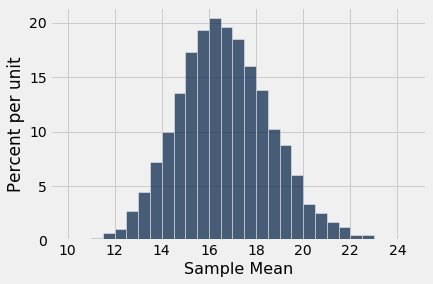

In [19]:
results.hist(bins=np.arange(10, 25, 0.5))

In [20]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')

model = Table().with_column('Color', colors)

model

Color
Purple
Purple
Purple
White

In [21]:
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

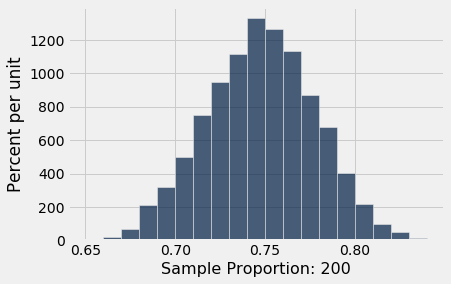

In [22]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

In [23]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

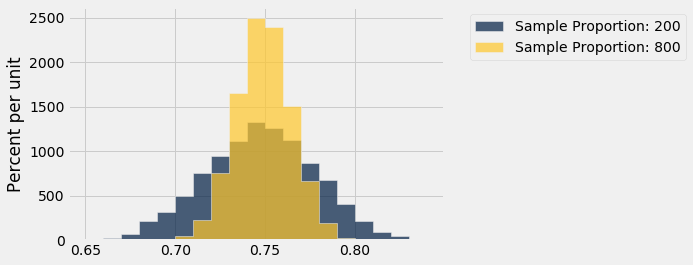

In [24]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))